# Parcialitos

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from urllib import request

url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/parcialitos.txt"
f = request.urlopen(url)
dataset = np.loadtxt(f, dtype=float, delimiter=",")
n = len(dataset)
dataset

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ],
       [95.86155507, 38.22527806,  0.        ],
       [75.01365839, 30.60326323,  0.        ],
       [82.30705337, 76.4819633 ,  1.        ],
       [69.36458876, 97.71869196,  1.        ],
       [39.53833914, 76.03681085,  0.        ],
       [53.97105215, 89.20735014,  1.        ],
       [69.07014406, 52.74046973,  1.        ],
       [67.94685548, 46.67857411,  0.        ],
       [70.66150955, 92.92713789,  1.        ],
       [76.97878373, 47.57596365,  1.        ],
       [67.37202755, 42.83843832,  0.   

In [23]:
def normalizar(x):
  return (x - x.mean(axis = 0))/x.std(axis = 0)

In [24]:
X = np.zeros(shape=(n, 2))
X[:,0] = dataset[:,0].copy()
X[:,1] = dataset[:,1].copy()

X_normalizado = normalizar(X)

Y = dataset[:,2].copy()

In [25]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [26]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(x=X_normalizado, y=Y, batch_size = n, epochs=100000, callbacks=[es])

Epoch 1/100000
1/1 [==============================] - 1s 808ms/step - loss: 0.7446 - accuracy: 0.5500
Epoch 2/100000
1/1 [==============================] - 0s 10ms/step - loss: 0.5987 - accuracy: 0.6100
Epoch 3/100000
1/1 [==============================] - 0s 7ms/step - loss: 0.5020 - accuracy: 0.7200
Epoch 4/100000
1/1 [==============================] - 0s 8ms/step - loss: 0.4379 - accuracy: 0.7500
Epoch 5/100000
1/1 [==============================] - 0s 7ms/step - loss: 0.3947 - accuracy: 0.7800
Epoch 6/100000
1/1 [==============================] - 0s 9ms/step - loss: 0.3648 - accuracy: 0.8000
Epoch 7/100000
1/1 [==============================] - 0s 8ms/step - loss: 0.3432 - accuracy: 0.8100
Epoch 8/100000
1/1 [==============================] - 0s 9ms/step - loss: 0.3272 - accuracy: 0.8200
Epoch 9/100000
1/1 [==============================] - 0s 6ms/step - loss: 0.3148 - accuracy: 0.8200
Epoch 10/100000
1/1 [==============================] - 0s 5ms/step - loss: 0.3050 - accuracy: 0.8

In [27]:
losses = hist.history['loss']
accuracies = hist.history['accuracy']

print(f"El riesgo empirico final es: {losses[-1]}")
print(f"La accuracy final es: {accuracies[-1]}")

El riesgo empirico final es: 0.20350033044815063
La accuracy final es: 0.8899999856948853


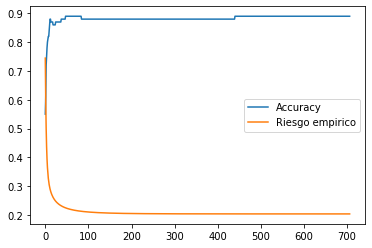

In [28]:
plt.plot(accuracies, label="Accuracy")
plt.plot(losses, label="Riesgo empirico")
plt.legend(loc="center right")
plt.show()

In [29]:
def normalizar_con_datos_de_dataset(x, dataset):
  return (x - dataset.mean(axis = 0))/dataset.std(axis = 0)

In [30]:
dato_a_predecir = normalizar_con_datos_de_dataset(np.array([63, 55]), X)
z=model.predict(x=dato_a_predecir[None, :]) # Devuelve la transformacion lineal W^t*X+b
def va_a_aprobar(z):
  return 1/(1+np.exp(-z)) >= 0.5

print(f"Va a aprobar: {va_a_aprobar(z)}")

Va a aprobar: [[False]]


[array([[3.9725318],
       [3.705536 ]], dtype=float32), array([1.7089612], dtype=float32)]


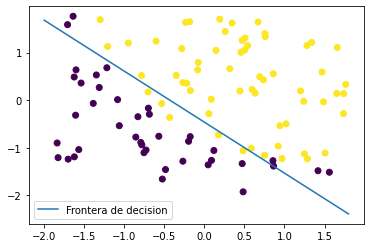

In [31]:
params = model.get_weights()
w1 = params[0][0][0]
w2 = params[0][1][0]
b = params[1][0]
print(params)
# w1*x1 + w2*x2 + b = 0
# x2 = -(w1*x1 + b)/w2
x = np.linspace(-2,1.8,50)
y = -(w1*x + b)/w2

plt.plot(x, y, label="Frontera de decision")
plt.legend(loc="lower left")
plt.scatter(x=X_normalizado[:,0], y=X_normalizado[:,1], c=dataset[:,2])
plt.show()

# Glass

In [32]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from urllib import request

url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/glass.csv"
f = request.urlopen(url)
dataset = np.genfromtxt(f, dtype=float, delimiter=',', names=True) 
n = len(dataset)
dataset

array([(1.52101, 13.64, 4.49, 1.1 , 71.78, 0.06,  8.75, 0.  , 0.  , 1.),
       (1.51761, 13.89, 3.6 , 1.36, 72.73, 0.48,  7.83, 0.  , 0.  , 1.),
       (1.51618, 13.53, 3.55, 1.54, 72.99, 0.39,  7.78, 0.  , 0.  , 1.),
       (1.51766, 13.21, 3.69, 1.29, 72.61, 0.57,  8.22, 0.  , 0.  , 1.),
       (1.51742, 13.27, 3.62, 1.24, 73.08, 0.55,  8.07, 0.  , 0.  , 1.),
       (1.51596, 12.79, 3.61, 1.62, 72.97, 0.64,  8.07, 0.  , 0.26, 1.),
       (1.51743, 13.3 , 3.6 , 1.14, 73.09, 0.58,  8.17, 0.  , 0.  , 1.),
       (1.51756, 13.15, 3.61, 1.05, 73.24, 0.57,  8.24, 0.  , 0.  , 1.),
       (1.51918, 14.04, 3.58, 1.37, 72.08, 0.56,  8.3 , 0.  , 0.  , 1.),
       (1.51755, 13.  , 3.6 , 1.36, 72.99, 0.57,  8.4 , 0.  , 0.11, 1.),
       (1.51571, 12.72, 3.46, 1.56, 73.2 , 0.67,  8.09, 0.  , 0.24, 1.),
       (1.51763, 12.8 , 3.66, 1.27, 73.01, 0.6 ,  8.56, 0.  , 0.  , 1.),
       (1.51589, 12.88, 3.43, 1.4 , 73.28, 0.69,  8.05, 0.  , 0.24, 1.),
       (1.51748, 12.86, 3.56, 1.27, 73.21, 0.54,  8

In [33]:
dataset.shape

(214,)

In [34]:
np.unique(dataset["Type"], return_counts=True)[0]

array([1., 2., 3., 5., 6., 7.])

In [35]:
X = np.zeros(shape=(214, 9))
Y = dataset['Type']

for i in range(0, 9):
  X[:,i] = dataset[dataset.dtype.names[i]]

Y[Y < 4] -= 1
Y[Y > 4] -= 2

categorias = {
    0: "building windows float processed",
    1: "building windows non float processed",
    2: "vehicle windows float processed",
    3: "containers",
    4: "tableware",
    5: "headlamps"
}

media = X.mean(axis=0)
desvio = X.std(axis=0)
X = (X-media)/desvio

In [36]:
np.unique(dataset["Type"], return_counts=True)[0]

array([0., 1., 2., 3., 4., 5.])

In [37]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(6, input_dim=9, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 60        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


In [38]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(x=X, y=Y, batch_size = n, epochs=10000, callbacks=[es])

Epoch 1/10000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 11ms/step - loss: 0.5881 - accuracy: 0.7290
Epoch 7502/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.5881 - accuracy: 0.7290
Epoch 7503/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.5881 - accuracy: 0.7290
Epoch 7504/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.5881 - accuracy: 0.7290
Epoch 7505/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.5881 - accuracy: 0.7290
Epoch 7506/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.5881 - accuracy: 0.7290
Epoch 7507/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.5881 - accuracy: 0.7290
Epoch 7508/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.5881 - accuracy: 0.7290
Epoch 7509/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.5881 - accuracy: 0.7290
Epoch 7510/10000
1/1 [======================

In [39]:
losses = hist.history['loss']
accuracies = hist.history['accuracy']

print(f"El riesgo empirico final es {losses[-1]}")
print(f"La accuracy final es {accuracies[-1]}")

El riesgo empirico final es 0.5860095620155334
La accuracy final es 0.7336448431015015


In [40]:
x_pred = ((1.52,13,3.5,1.2,73,0.6,9,0.1,0.2) - media) / desvio
model.predict(y[x_pred]).argmax()

0

Baseline model:
              precision    recall  f1-score   support

         0.0       0.66      0.69      0.67        70
         1.0       0.68      0.75      0.71        76
         2.0       0.43      0.18      0.25        17
         3.0       0.92      0.85      0.88        13
         4.0       1.00      1.00      1.00         9
         5.0       1.00      1.00      1.00        29

    accuracy                           0.73       214
   macro avg       0.78      0.74      0.75       214
weighted avg       0.72      0.73      0.72       214



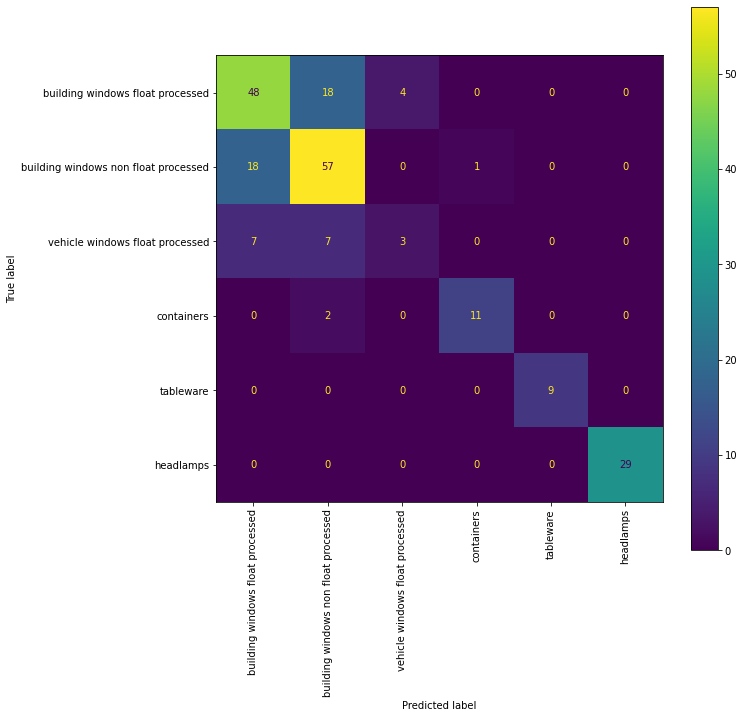

In [41]:
from matplotlib import axis
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

y_pred = model.predict(X).argmax(axis=1)

def show_results(y_true,y_pred):

  # Plot confusion matrix
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,display_labels=categorias.values(),ax=ax)
  plt.xticks(rotation=90)

  # Show Classification report
  print(classification_report(y_true,y_pred))


print("Baseline model:")
show_results(Y,y_pred)

# Prostata

In [42]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from urllib import request


prostata_data = np.genfromtxt(request.urlopen("https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_data.csv"), delimiter=',', skip_header=True)
prostata_label = np.genfromtxt(request.urlopen("https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_label.csv"), delimiter=',', skip_header=True, dtype="str")

In [43]:
prostata_data = prostata_data[:,1:-1]
prostata_label = prostata_label[:,1]
dataset = np.c_[prostata_data, prostata_label]
dataset = dataset[dataset[:,-1] != '']
dataset

array([['182.88666186557907', '0.0', '120.05514344779301', ...,
        '78.37018497556028', '1194.6142797413468', 'healthy'],
       ['169.43159030962224', '4.546040591889395', '298.45756678247994',
        ..., '108.7634073540107', '926.9470629677108', 'healthy'],
       ['33.12437860839822', '1717.1493536474945', '171.34008138556848',
        ..., '27.398994070467992', '510.64609776288006', 'cancer'],
       ...,
       ['113.63945879890655', '1.4285461257602596', '89.56082978818914',
        ..., '111.93171044261584', '447.58706049886086', 'benign'],
       ['100.94499664510126', '213.6023595973982', '533.7078535932463',
        ..., '157.6249104461427', '630.2223691989038', 'benign'],
       ['17.15438852402047', '20.59355440565786', '167.40034087942942',
        ..., '56.84535066851054', '137.33733651318974', 'cancer']],
      dtype='<U32')

In [44]:
valores_unicos = np.unique(dataset[:,-1], return_inverse=True)
dataset[:,-1] = valores_unicos[1]
categorias = valores_unicos[0]

In [45]:
x_train = dataset[:,:-2]
x_train = x_train.astype(float)
y_train = dataset[:,-1]
y_train = y_train.astype(int)
x_train.shape

(390, 760)

In [46]:
desvio = x_train.std(axis=0)
media = x_train.mean(axis=0)
x_train_normalizado = (x_train-media)/desvio

In [74]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim=x_train.shape[1], activation=tf.keras.activations.softmax))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 3044      
                                                                 
Total params: 3,044
Trainable params: 3,044
Non-trainable params: 0
_________________________________________________________________


In [75]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(x=x_train_normalizado, y=y_train, batch_size = x_train.shape[0], epochs=2000, callbacks=[es])

Epoch 1/2000
1/1 [==============================] - 0s 194ms/step - loss: 1.7719 - accuracy: 0.2513
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.4035 - accuracy: 0.6590


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.9843 - accuracy: 0.6333
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.9072 - accuracy: 0.6615
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.8584 - accuracy: 0.6538
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.8288 - accuracy: 0.6872
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.8088 - accuracy: 0.6641
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7987 - accuracy: 0.7179
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7909 - accuracy: 0.6821
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7981 - accuracy: 0.7282
Epoch 11/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7899 - accuracy: 0.6923
Epoch 12/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.8039 - accuracy: 0.7282
Epoch 13/2000
1/

In [76]:
losses = hist.history["loss"]
accuracies = hist.history["accuracy"]

print(f"El riesgo empirico final fue {losses[-1]}")
print(f"La accuracy final fue {accuracies[-1]}")

El riesgo empirico final fue 0.03188678249716759
La accuracy final fue 1.0


Baseline model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       146
           3       1.00      1.00      1.00        34

    accuracy                           1.00       390
   macro avg       1.00      1.00      1.00       390
weighted avg       1.00      1.00      1.00       390



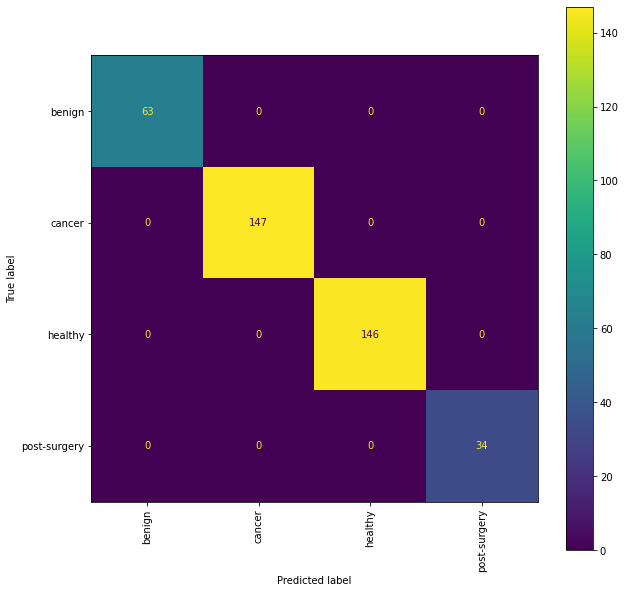

In [77]:
from matplotlib import axis
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

y_pred = model.predict(x_train_normalizado).argmax(axis=1)

def show_results(y_true,y_pred):

  # Plot confusion matrix
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,display_labels=categorias,ax=ax)
  plt.xticks(rotation=90)

  # Show Classification report
  print(classification_report(y_true,y_pred))


print("Baseline model:")
show_results(y_train,y_pred)

# MNIST

In [51]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

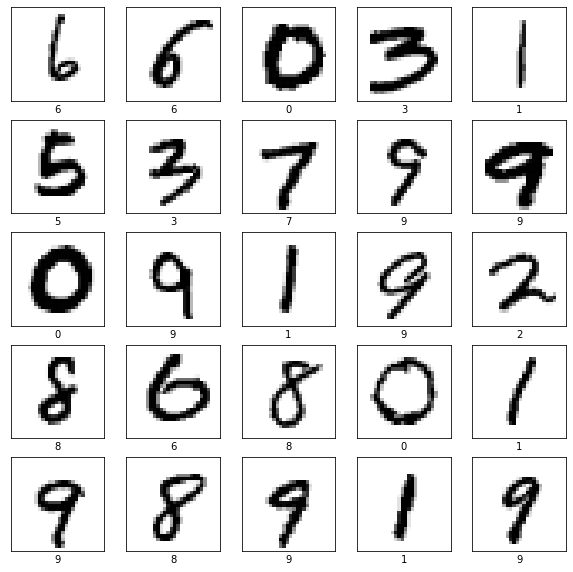

In [52]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap="gray_r")
  plt.xlabel(train_labels[img_index])

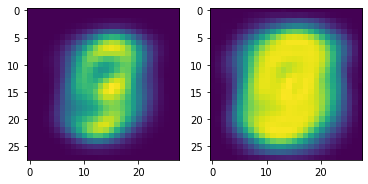

array([4.75319812e-01, 1.36117791e+00, 8.81808959e-01, 3.67420400e-02,
       6.53191821e-02, 1.94634255e-01, 1.05500260e+00, 2.09509594e+00,
       2.96203852e+00, 3.32385186e+00, 4.86925744e+00, 5.52898708e+00,
       5.69363184e+00, 5.69353295e+00, 5.92301803e+00, 5.76607219e+00,
       5.97036202e+00, 5.41337618e+00, 4.33045725e+00, 3.71652963e+00,
       3.20866334e+00, 1.94306720e+00, 1.21123146e+00, 8.06569391e-01,
       2.61276729e-01, 1.29741448e-01, 8.15496800e-01, 4.57514954e-01,
       2.66802953e+00, 4.99442477e+00, 7.13621448e+00, 9.71436683e+00,
       1.29303271e+01, 1.55399807e+01, 1.88203181e+01, 2.19643978e+01,
       2.47931227e+01, 2.61971780e+01, 2.67992946e+01, 2.57316560e+01,
       2.32744702e+01, 2.00644556e+01, 1.52931509e+01, 1.11140133e+01,
       7.46807775e+00, 3.96079754e+00, 2.49970194e+00, 1.10247848e+00,
       6.02292464e-01, 6.59481446e-01, 8.54013427e-01, 3.15019036e+00,
       6.02849655e+00, 9.92481779e+00, 1.45951090e+01, 2.05844898e+01,
      

In [53]:
media = train_images.mean(axis = 0)
desvio = train_images.std(axis = 0)
plt.subplot(1,2,1)
plt.imshow(media)

plt.subplot(1,2,2)
plt.imshow(desvio)

plt.show()
desvio[desvio != 0]

In [54]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [55]:
def transformar_a_vector(dataset_imagenes, media, desvio):
  return dataset_imagenes[:, desvio != 0] - media[desvio != 0] / desvio[desvio != 0]

In [56]:
vector_train_images_normalizado = transformar_a_vector(train_images, media, desvio)
vector_test_images_normalizado = transformar_a_vector(test_images, media, desvio)

In [57]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(np.unique(train_labels).size,  input_dim=vector_train_images_normalizado.shape[1]))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7180      
                                                                 
Total params: 7,180
Trainable params: 7,180
Non-trainable params: 0
_________________________________________________________________


In [58]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(x=vector_train_images_normalizado, y=train_labels, batch_size = vector_train_images_normalizado.shape[0], epochs=2000, callbacks=[es])

Epoch 1/2000
1/1 [==============================] - 1s 768ms/step - loss: 147.1339 - accuracy: 0.1441
Epoch 2/2000
1/1 [==============================] - 0s 103ms/step - loss: 119.7145 - accuracy: 0.1700
Epoch 3/2000
1/1 [==============================] - 0s 88ms/step - loss: 103.9275 - accuracy: 0.1989
Epoch 4/2000
1/1 [==============================] - 0s 101ms/step - loss: 93.1627 - accuracy: 0.2263
Epoch 5/2000
1/1 [==============================] - 0s 135ms/step - loss: 85.6722 - accuracy: 0.2509
Epoch 6/2000
1/1 [==============================] - 0s 60ms/step - loss: 79.8717 - accuracy: 0.2725
Epoch 7/2000
1/1 [==============================] - 0s 145ms/step - loss: 75.0498 - accuracy: 0.2924
Epoch 8/2000
1/1 [==============================] - 0s 56ms/step - loss: 70.9111 - accuracy: 0.3105
Epoch 9/2000
1/1 [==============================] - 0s 102ms/step - loss: 67.3044 - accuracy: 0.3288
Epoch 10/2000
1/1 [==============================] - 0s 127ms/step - loss: 64.1087 - accura

In [59]:
losses = hist.history["loss"]
accuracies = hist.history["accuracy"]

print(f"El riesgo empirico final fue {losses[-1]}")
print(f"La accuracy final fue {accuracies[-1]}")

El riesgo empirico final fue 4.353997707366943
La accuracy final fue 0.8752999901771545


In [60]:
y_pred = model.predict(vector_test_images_normalizado).argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 8, 6])

Baseline model:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       980
           1       0.96      0.96      0.96      1135
           2       0.88      0.84      0.86      1032
           3       0.84      0.85      0.85      1010
           4       0.87      0.87      0.87       982
           5       0.81      0.79      0.80       892
           6       0.90      0.91      0.91       958
           7       0.87      0.87      0.87      1028
           8       0.80      0.79      0.79       974
           9       0.82      0.82      0.82      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



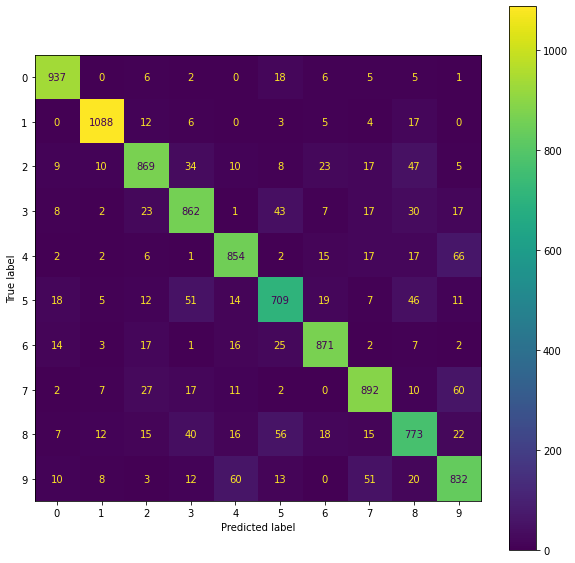

In [61]:
# from matplotlib import axis
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


def show_results(y_true,y_pred):

  # Plot confusion matrix
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,ax=ax)

  # Show Classification report
  print(classification_report(y_true,y_pred))


print("Baseline model:")
show_results(test_labels,y_pred)

# FASHION-MNIST

In [62]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


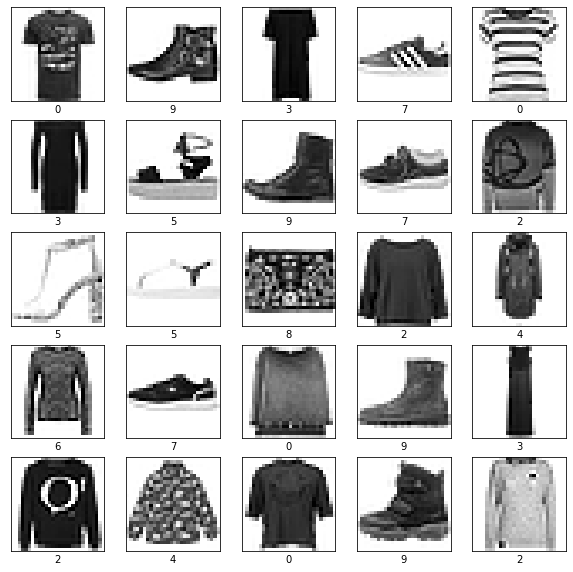

In [63]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap="gray_r")
  plt.xlabel(train_labels[img_index])

In [64]:
def transformar_a_vector(dataset_imagenes):
  return dataset_imagenes.reshape(dataset_imagenes.shape[0], dataset_imagenes.shape[1] * dataset_imagenes.shape[2])

In [65]:
vector_train_images = transformar_a_vector(train_images)
vector_test_images = transformar_a_vector(test_images)

In [66]:
media = vector_train_images.mean(axis = 0)
desvio = vector_train_images.std(axis = 0)

In [67]:
vector_train_images_normalizado = (vector_train_images - media)/desvio
vector_test_images_normalizado = (vector_test_images - media)/desvio

In [68]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [69]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(np.unique(train_labels).size,  input_dim=vector_train_images_normalizado.shape[1]))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [70]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(x=vector_train_images_normalizado, y=train_labels, batch_size = vector_train_images_normalizado.shape[0], epochs=2000, callbacks=[es])

Epoch 1/2000
1/1 [==============================] - 0s 422ms/step - loss: 3.3357 - accuracy: 0.0748
Epoch 2/2000
1/1 [==============================] - 0s 140ms/step - loss: 1.4075 - accuracy: 0.4995
Epoch 3/2000
1/1 [==============================] - 0s 101ms/step - loss: 1.1194 - accuracy: 0.6095
Epoch 4/2000
1/1 [==============================] - 0s 109ms/step - loss: 1.0000 - accuracy: 0.6530
Epoch 5/2000
1/1 [==============================] - 0s 106ms/step - loss: 0.9282 - accuracy: 0.6756
Epoch 6/2000
1/1 [==============================] - 0s 103ms/step - loss: 0.8775 - accuracy: 0.6955
Epoch 7/2000
1/1 [==============================] - 0s 111ms/step - loss: 0.8390 - accuracy: 0.7067
Epoch 8/2000
1/1 [==============================] - 0s 110ms/step - loss: 0.8083 - accuracy: 0.7203
Epoch 9/2000
1/1 [==============================] - 0s 131ms/step - loss: 0.7830 - accuracy: 0.7273
Epoch 10/2000
1/1 [==============================] - 0s 128ms/step - loss: 0.7618 - accuracy: 0.7368

In [71]:
losses = hist.history["loss"]
accuracies = hist.history["accuracy"]

print(f"El riesgo empirico final fue {losses[-1]}")
print(f"La accuracy final fue {accuracies[-1]}")

El riesgo empirico final fue 0.37868908047676086
La accuracy final fue 0.8690166473388672


In [72]:
pred_label = model.predict(vector_test_images_normalizado).argmax(axis=1)
pred_label

array([9, 2, 1, ..., 8, 1, 5])

Baseline model:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.87      0.85      1000
           4       0.73      0.76      0.75      1000
           5       0.93      0.92      0.92      1000
           6       0.63      0.55      0.59      1000
           7       0.90      0.93      0.92      1000
           8       0.94      0.94      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



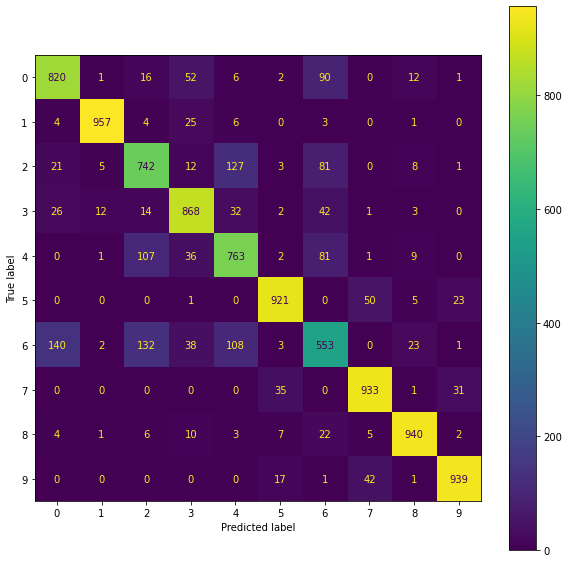

In [73]:
# from matplotlib import axis
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


def show_results(y_true,y_pred):

  # Plot confusion matrix
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,ax=ax)

  # Show Classification report
  print(classification_report(y_true,y_pred))


print("Baseline model:")
show_results(test_labels,pred_label)